# **📌 Import**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
import warnings
import sys
warnings.filterwarnings('ignore')
# Thiết lập style cho matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
sklearn.set_config(enable_metadata_routing=True)

In [ ]:
sys.path.append("..")
from modules import tabular

# **📥 Download Dataset**

In [45]:
import kagglehub
import os
import shutil

data_dir = "../data/amazon_products_2025/"
raw_data_dir = os.path.join(data_dir, "raw_data/")
data_file_name = "amazon_products_sales_data_cleaned.csv"
model_result_path = os.path.join(data_dir, "model_result/")

In [ ]:
os.makedirs(data_dir, exist_ok=True)

if os.path.exists(os.path.join(raw_data_dir, data_file_name)):
    print("Data file exists.")
else:
    path = kagglehub.dataset_download(
        handle="ikramshah512/amazon-products-sales-dataset-42k-items-2025"
    )
    src = os.path.join(path, data_file_name)
    os.makedirs(raw_data_dir, exist_ok=True)
    shutil.copy(src, raw_data_dir)

print("Path to data:", os.path.join(raw_data_dir, data_file_name))

Data file exists.
Path to data: ../data/amazon_products_2025/raw_data/amazon_products_sales_data_cleaned.csv


In [47]:
df = pd.read_csv(os.path.join(raw_data_dir, data_file_name))
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


# **📊 EDA**

In [48]:
tabular.dataset_info(df=df)


Dataset Info:
Total samples: 42,675
Features: 17
Data Shape: (42675, 17)
Columns: Index(['product_title', 'product_rating', 'total_reviews',
       'purchased_last_month', 'discounted_price', 'original_price',
       'is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability',
       'delivery_date', 'sustainability_tags', 'product_image_url',
       'product_page_url', 'data_collected_at', 'product_category',
       'discount_percentage'],
      dtype='object')
Dtypes:
 product_title            object
product_rating          float64
total_reviews           float64
purchased_last_month    float64
discounted_price        float64
original_price          float64
is_best_seller           object
is_sponsored             object
has_coupon               object
buy_box_availability     object
delivery_date            object
sustainability_tags      object
product_image_url        object
product_page_url         object
data_collected_at        object
product_category         object


In [49]:
tabular.missing_report(df)

Missing Value:
                      Missing  Percent
sustainability_tags     39267    92.01
buy_box_availability    14653    34.34
delivery_date           11983    28.08
purchased_last_month    10511    24.63
product_page_url         2069     4.85
original_price           2062     4.83
discounted_price         2062     4.83
discount_percentage      2062     4.83
total_reviews            1024     2.40
product_rating           1024     2.40
product_title               0     0.00
is_best_seller              0     0.00
is_sponsored                0     0.00
has_coupon                  0     0.00
product_image_url           0     0.00
data_collected_at           0     0.00
product_category            0     0.00


In [50]:
tabular.column_report(df)

Column Report:
                       Dtypes  Nunique
product_title          object     8808
product_rating        float64       31
total_reviews         float64     4413
purchased_last_month  float64       29
discounted_price      float64     3558
original_price        float64     3151
is_best_seller         object       12
is_sponsored           object        2
has_coupon             object       42
buy_box_availability   object        1
delivery_date          object       24
sustainability_tags    object       16
product_image_url      object     8038
product_page_url       object    40606
data_collected_at      object     1559
product_category       object       15
discount_percentage   float64     1526


In [51]:
numeric_feature, numeric_stat = tabular.numeric_stat_report(df)
numeric_stat

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,discount_percentage
count,41651.000000,41651.000000,32164.000000,40613.000000,40613.000000,40613.000000
mean,4.399431,3087.106000,1293.665278,243.227289,257.611107,6.547151
std,0.386997,13030.460133,6318.323574,473.351545,496.633495,12.744715
min,1.000000,1.000000,50.000000,2.160000,2.160000,0.000000
25%,4.200000,82.000000,100.000000,29.690000,32.990000,0.000000
50%,4.500000,343.000000,200.000000,84.990000,89.000000,0.000000
75%,4.700000,1886.000000,400.000000,224.000000,229.990000,8.490000
max,5.000000,865598.000000,100000.000000,5449.000000,5449.000000,85.420000


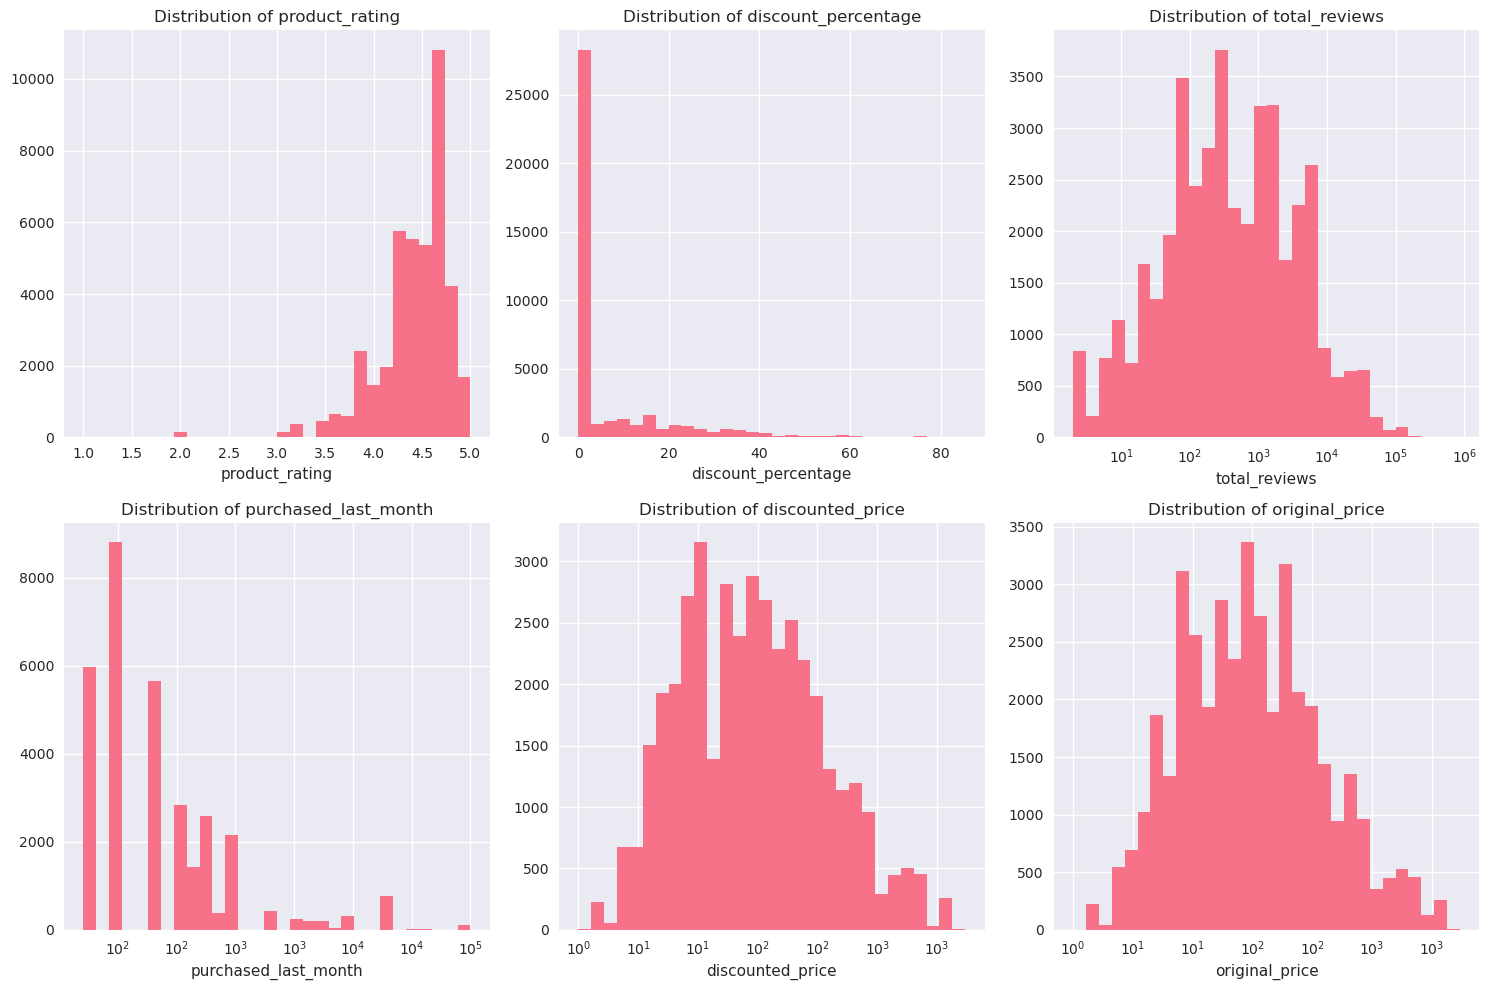

In [52]:
plot_config = {
    "normal": ["product_rating", "discount_percentage"],
    "log": ["total_reviews", "purchased_last_month", "discounted_price", "original_price"]
}
tabular.numeric_plot(df, plot_config, "histogram")

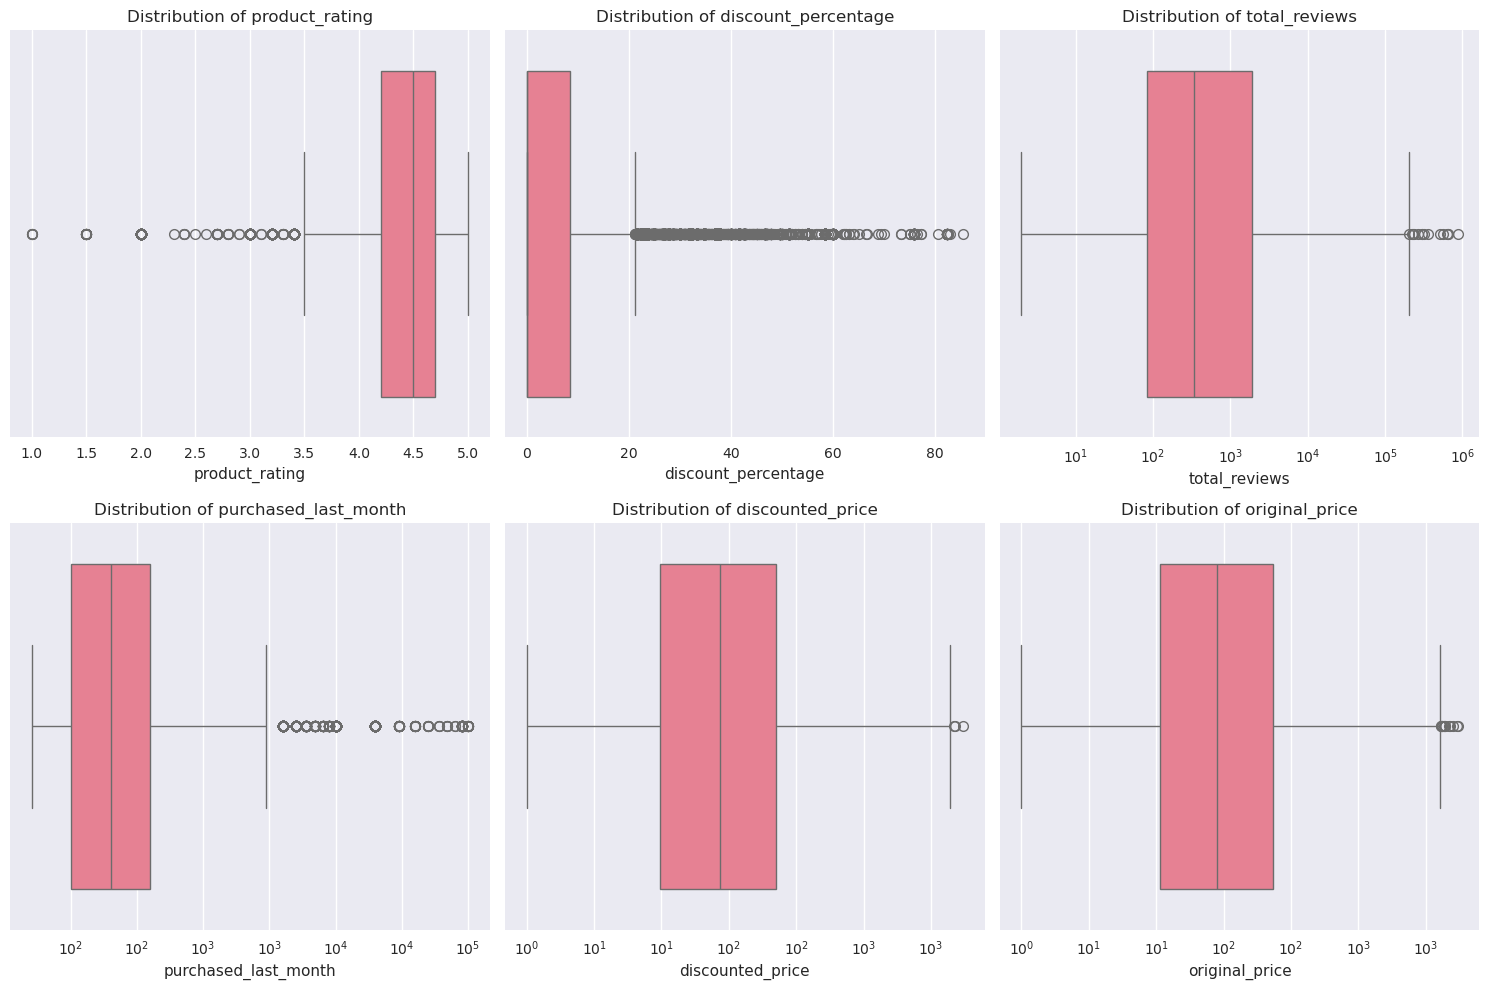

In [53]:
plot_config = {
    "normal": ["product_rating", "discount_percentage"],
    "log": ["total_reviews", "purchased_last_month", "discounted_price", "original_price"]
}
tabular.numeric_plot(df, plot_config, "boxplot")

In [54]:
categorical_feature = tabular.categorical_stat_report(df)

================== Top 10 product_title ==================
Unique value: 8808
Missing value: 0


product_title
Duracell Coppertop 9V Battery, 6 Count (Pack of 1), 9 Volt Battery with Long-lasting Power, All-Purpose Alkaline 9V Battery for Household and Office Devices                                     744
Energizer MAX AA Batteries (16 Pack), Double A Alkaline Batteries                                                                                                                                566
TRX Training 6 Month On-Demand Membership - Unlimited Access to Expert-Led Workouts, Personalized Programs, Strength, Cardio & Recovery - Train Anytime                                          456
KODAK 10.1 Inch WiFi Digital Picture Frame,1280x800 HD IPS Touch Screen, Electronic Smart Photo Frame with 32 GB Memory, Auto-Rotate, Instantly Share Photos/Videos Anywhere                     438
Belkin MagSafe-Compatible Charger, 3-in-1 Wireless Charging Station, Qi2-Certified 15W Wireless Charge for Apple iPhone 16 Series, Apple Watch, AirPods w/Non-Slip Base, 40W Included - Black    377
R

================== Top 10 is_best_seller ==================
Unique value: 12
Missing value: 0


is_best_seller
No Badge             40814
Amazon's               744
Limited time deal      409
Best Seller            275
Save 30%               125
Ends in                 97
Save 10%                61
Save 18%                57
Save 17%                51
Save 12%                26
Name: count, dtype: int64

================== Top 10 is_sponsored ==================
Unique value: 2
Missing value: 0


is_sponsored
Organic      35664
Sponsored     7011
Name: count, dtype: int64

================== Top 10 has_coupon ==================
Unique value: 42
Missing value: 0


has_coupon
No Coupon                    40727
Save $16.00  with coupon       438
Save 15%  with coupon          398
Save 10%  with coupon          218
Save 5%  with coupon           191
Save 50%  with coupon          123
Save $11.00  with coupon       120
Save $100.00  with coupon       97
Save 40%  with coupon           96
Save $25.00  with coupon        65
Name: count, dtype: int64

================== Top 10 buy_box_availability ==================
Unique value: 1
Missing value: 14653


buy_box_availability
Add to cart    28022
Name: count, dtype: int64

================== Top 10 delivery_date ==================
Unique value: 24
Missing value: 11983


delivery_date
2025-09-04    7862
2025-09-01    6334
2025-09-03    5238
2025-09-11    3723
2025-09-02    3401
2025-09-09    1511
2025-09-05    1001
2025-09-08     763
2025-08-30     192
2025-09-13     127
Name: count, dtype: int64

================== Top 10 sustainability_tags ==================
Unique value: 16
Missing value: 39267


sustainability_tags
Small Business               1341
Carbon impact                 769
Works with Alexa              425
Energy efficiency             262
Alexa Built-in                184
Manufacturing practices       148
Energy efficiency +3 more     121
Energy efficiency +1 more      93
Forestry practices             18
Safer chemicals +2 more        18
Name: count, dtype: int64

================== Top 10 product_image_url ==================
Unique value: 8038
Missing value: 0


product_image_url
https://m.media-amazon.com/images/I/51Xr76m2WLL._AC_UL320_.jpg    1461
https://m.media-amazon.com/images/I/41xG8Yh0rlL._AC_UL320_.jpg    1078
https://m.media-amazon.com/images/I/61ZSfHGJ2bL._AC_UL320_.jpg     744
https://m.media-amazon.com/images/I/91wM+1e9MSL._AC_UL320_.jpg     566
https://m.media-amazon.com/images/I/5179luWipKL._AC_UL320_.jpg     515
https://m.media-amazon.com/images/I/51rlsc7G2UL._AC_UL320_.jpg     456
https://m.media-amazon.com/images/I/716bPrNJ0GL._AC_UL320_.jpg     438
https://m.media-amazon.com/images/I/61XBmb46FVL._AC_UL320_.jpg     377
https://m.media-amazon.com/images/I/71yebnw2SUL._AC_UL320_.jpg     371
https://m.media-amazon.com/images/I/71+ok4zsAxL._AC_UL320_.jpg     254
Name: count, dtype: int64

================== Top 10 product_page_url ==================
Unique value: 40606
Missing value: 2069


product_page_url
https://www.amazon.com/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxNDQ2OjE3NTU4MDAwNjg6c3BfYXRmX2Jyb3dzZTozMDA2NzE0NTMwMTcyMDI6OjA6Og&url=%2FBOYA-BOYALINK-Microphone-Micophone-Cancelling%2Fdp%2FB0DNZB7TQG%2Fref%3Dsr_1_1_sspa%3Fdib%3DeyJ2IjoiMSJ9.avmZlHCQuVOwikquBqYSIjN8SVcyxtkXHQMPt7Zjzkf4TeZzrZfQETMhdWuWgtTrVz8ITKpXLHvZj0fZRjxqgMPYNMitRqeUoeIwdYfc5nnzJ8m0T8HYeedlh3YSOhJQjeHskevMUQWyg6TtoB2tHcHt-edYPsQ6VwFQTI6avsPrgVpFKrto3ff9TDR9BcRyPwM6AiYn-vh7wA5PP9DjZddhCPf7bVPcHMZ6Hwd40dQDWm9_M8R-LcwKY8wnuWRUSplhfYJBvTjAgsb3Y3y88VGpfqY3V8Rd2ge-woBzUMA.yqwi-krmElGgXIMa8kKUPx1XmaXd9lHaAkMkVVpStxo%26dib_tag%3Dse%26qid%3D1755800068%26refinements%3Dp_n_g-101014971069111%253A119653281011%26s%3Delectronics%26sr%3D1-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfYnJvd3Nl%26psc%3D1      1
https://www.amazon.com/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxNDQ2OjE3NTU4MDAwNjg6c3BfYXRmX2Jyb3dzZTozMDA4NjA2Mzc2NDIxMDI6OjA6Og&url=%2FLISEN-Charging-Lighting-MacBook-Chargers%2Fdp%2FB0DHWZCZDZ%2Fref%3Dsr

================== Top 10 data_collected_at ==================
Unique value: 1559
Missing value: 0


data_collected_at
2025-08-21 11:15:31    33
2025-08-21 11:15:58    33
2025-08-21 11:14:29    33
2025-08-21 11:16:09    33
2025-08-30 19:53:37    33
2025-08-30 19:54:27    33
2025-08-30 19:54:52    33
2025-08-30 00:39:26    33
2025-08-30 00:39:40    33
2025-08-30 00:40:06    33
Name: count, dtype: int64

================== Top 10 product_category ==================
Unique value: 15
Missing value: 0


product_category
Other Electronics    8755
Laptops              8693
Phones               6563
Cameras              3677
Power & Batteries    2877
TV & Display         2630
Chargers & Cables    1833
Storage              1630
Speakers             1345
Networking           1070
Name: count, dtype: int64

# **Preprocessing**

In [55]:
use_cols = ["product_rating", "total_reviews", "purchased_last_month", "discounted_price", "original_price",
        "is_sponsored", "product_category"]

feature_cols = ["product_rating", "total_reviews", "purchased_last_month", "original_price",
        "is_sponsored", "product_category"]

data = df[use_cols]

In [56]:
target = "discounted_price"
data = data.dropna(subset=[target]) # Drop NA in target column

In [57]:
# If you don't choose to dropna in other columns of dataset, comment this cell
data = data.dropna()

In [58]:
X = data.drop(columns=target)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train data Shape: {X_train.shape}")
print(f"X_test data Shape: {X_test.shape}")

y_train = y_train.to_frame()
y_test = y_test.to_frame()

X_train data Shape: (24182, 6)
X_test data Shape: (6046, 6)


In [59]:
X_train

,product_rating,total_reviews,purchased_last_month,original_price,is_sponsored,product_category
16916,4.3,381.0,100.0,66.01,Organic,Cameras
9654,4.4,1146.0,300.0,18.95,Organic,Phones
36420,3.8,44.0,100.0,199.00,Organic,Chargers & Cables
1985,4.3,196.0,200.0,129.95,Sponsored,Phones
39079,4.7,182.0,200.0,101.16,Organic,Laptops
...,...,...,...,...,...,...
42006,4.0,1541.0,100.0,239.99,Organic,Printers & Scanners
6901,4.2,21.0,100.0,162.85,Organic,Cameras
1037,4.6,14962.0,5000.0,49.99,Organic,Phones
21954,4.6,1138.0,100.0,49.95,Organic,Cameras


In [60]:
num_imputer_dict = tabular.get_preprocesser("num_impute", "all")
cate_imputer_dict = tabular.get_preprocesser("cate_impute", "all")

print("num_imputer_dict:\n", num_imputer_dict)
print("cate_imputer_dict\n", cate_imputer_dict)

num_imputer_dict:
 {'mean': SimpleImputer(), 'median': SimpleImputer(strategy='median'), 'constant': SimpleImputer(strategy='constant')}
cate_imputer_dict
 {'most': SimpleImputer(strategy='most_frequent'), 'constant': SimpleImputer(strategy='constant')}


In [61]:
missing_config = { # Example of config
    "numeric": (num_imputer_dict["mean"], [0, 1, 2, 3]),
    "categorical": (cate_imputer_dict["most"], [4, 5])
}

missing_value_pipeline = tabular.make_column_pipeline(missing_config)

In [62]:
scaler_dict = tabular.get_preprocesser("scale", "all")

print("scaler_dict:\n", scaler_dict)

scaler_dict:
 {'standard': StandardScaler(), 'minmax': MinMaxScaler(), 'robust': RobustScaler(), 'log1p_robust': Log1pRobustScaler()}


In [63]:
scaling_config = { # Example of config
    "minmax_scaler": (scaler_dict["minmax"], [0]),
    "robust_scaler": (scaler_dict["log1p_robust"], [1, 2, 3])
}

scaling_pipeline = tabular.make_column_pipeline(scaling_config)

In [64]:
pca_dict = tabular.get_preprocesser("pca", "all")

print("pca_dict:\n", pca_dict)

pca_dict:
 {'pca_0.95_auto': PCA(n_components=0.95), 'pca_0.95_full': PCA(n_components=0.99, svd_solver='full'), 'pca_0.99_auto': PCA(n_components=0.99), 'pca_0.99_full': PCA(n_components=0.99, svd_solver='full')}


In [65]:
pca_config = {
    "pca_0.99_auto": (pca_dict["pca_0.95_auto"], [0, 1, 2, 3])
}

pca_pipeline = tabular.make_column_pipeline(pca_config)

In [66]:
encoder_dict = tabular.get_preprocesser("encode", "all")

print("encoder_dict:\n", encoder_dict)

encoder_dict:
 {'onehot': OneHotEncoder(handle_unknown='ignore', sparse_output=False), 'ordinal': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)}


In [67]:
encoding_config = { # Example of config
    "onehot_encoder": (encoder_dict["onehot"], [4, 5])
}

# Default encoding pipeline
encoding_pipeline = tabular.make_column_pipeline(encoding_config)

## Processing pipeline

In [68]:
# Preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    # ("missing", missing_value_pipeline),
    ("scaling", scaling_pipeline),
    # ("pca", pca_pipeline),
    ("encoding", encoding_pipeline)
])

# **Train & Evaluate Model**


In [69]:
# Scaling y_train for better training
y_scaler = tabular.Log1pRobustScaler()
y_train = pd.DataFrame(y_scaler.fit_transform(y_train.values))

In [70]:
X_train = preprocessing_pipeline.fit_transform(X_train)
X_test = preprocessing_pipeline.transform(X_test)

In [71]:
from sklearn.model_selection import ParameterGrid
# Model chosing
param_grid = [
    {
        "model": [LinearRegression()],
        "model__fit_intercept": [True],
        "model__copy_X": [True],
        "model__n_jobs": [None]
    },
    {
        "model": [RandomForestRegressor()],
        "model__n_estimators": [100],
        "model__criterion": ["squared_error"],
        "model__max_depth": [None],
        "model__min_samples_split": [2],
        "model__min_samples_leaf": [1],
        "model__n_jobs": [None],
        "model__random_state": [None]
    },
    {
        "model": [SVR()],
        "model__kernel": ["rbf"],
        "model__degree": [3],
        "model__gamma": ["scale"],
        "model__C": [1.0],
        "model__epsilon": [0.1]
    },
    {
        "model": [MLPRegressor()],
        "model__hidden_layer_sizes": [(100,)],
        "model__activation": ["relu"],
        "model__solver": ["adam"],
        "model__alpha": [0.0001],
        "model__batch_size": ["auto"],
        "model__learning_rate": ["constant"],
        "model__max_iter": [200],
        "model__random_state": [None]
    }
]
grid = ParameterGrid(param_grid=param_grid)

In [72]:
results = []

for params in grid:
    # Tạo pipeline với model tương ứng
    pipe = Pipeline([
        # ("preprocess", preprocessing_pipeline),
        ("model", params["model"])
    ])
    pipe.set_params(**params)
    pipe.set_output(transform="pandas")

    pipe.fit(X_train, y_train)
    y_pred_scaled = pipe.predict(X_test)
    y_pred = pd.DataFrame(y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)))

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)

    # Lưu kết quả
    results.append({
        "params": params["model"].__class__.__name__,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "r2": r2
    })

# Xuất kết quả ra DataFrame
df_results = pd.DataFrame(results)
print(df_results)

                  params           mse        rmse        mae        r2
0       LinearRegression  11746.016265  108.379040  20.306573  0.826111
1  RandomForestRegressor    431.559537   20.774011   3.767127  0.993611
2                    SVR   2351.978731   48.497203  21.446804  0.965181
3           MLPRegressor   2276.565143   47.713364  13.811468  0.966298


# **Autotrain model with multi config**

In [ ]:
preprocess_config = [
    {
        "num_impute": num_impute,
        "cate_impute": cate_impute,
        "scale": scale,
        "pca": pca,
        "encode": encode
    }
    for num_impute in ["none", "mean", "median"]
    for cate_impute in ["none", "most"]
    for scale in ["none", "standard", "minmax", "robust", "log1p_robust"]
    for pca in ["none", "pca_0.95_auto", "pca_0.95_full", "pca_0.99_auto", "pca_0.99_full"]
    for encode in ["onehot", "ordinal"]
]
# You can make a new param grid for multi model

In [74]:
main_data = df[use_cols]

In [75]:
main_data

,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_sponsored,product_category
0,4.6,375.0,300.0,89.68,159.00,Sponsored,Phones
1,4.3,2457.0,6000.0,9.99,15.99,Sponsored,Laptops
2,4.6,3044.0,2000.0,314.00,349.00,Sponsored,Laptops
3,4.6,35882.0,10000.0,162.24,162.24,Organic,Phones
4,4.8,28988.0,10000.0,72.74,72.74,Organic,Phones
...,...,...,...,...,...,...,...
42670,5.0,1.0,100.0,195.99,195.99,Organic,TV & Display
42671,4.2,20.0,200.0,89.99,89.99,Organic,Cameras
42672,4.3,57.0,50.0,899.99,1099.99,Organic,Chargers & Cables
42673,4.7,7102.0,500.0,10.39,15.98,Organic,Chargers & Cables


In [76]:
split_datasets = tabular.preprocess(preprocess_config, main_data, "discounted_price")

In [77]:
split_datasets

,num_impute,cate_impute,scale,pca,encode,data
0,none,none,none,none,onehot,"([[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,none,none,none,none,ordinal,"([[0.0, 0.0, 4.3, 381.0, 100.0, 66.01], [0.0, ..."
2,none,none,none,pca_0.95_auto,onehot,"([[-3516.136510880982, -754.3612686828529, 1.0..."
3,none,none,none,pca_0.95_auto,ordinal,"([[-3516.136510880982, -754.3612686828529, 0.0..."
4,none,none,none,pca_0.95_full,onehot,"([[-3516.1365108809036, -754.3612686828619, 1...."
...,...,...,...,...,...,...
295,median,most,log1p_robust,pca_0.95_full,ordinal,"([[-0.6072268759139337, 0.029025196574582992, ..."
296,median,most,log1p_robust,pca_0.99_auto,onehot,"([[-0.6072268759139361, 0.02902519657460126, 0..."
297,median,most,log1p_robust,pca_0.99_auto,ordinal,"([[-0.6072268759139361, 0.02902519657460126, 0..."
298,median,most,log1p_robust,pca_0.99_full,onehot,"([[-0.6072268759139337, 0.029025196574582992, ..."


In [ ]:
for params in grid:
    csv_path = os.path.join(model_result_path, f"{params["model"].__class__.__name__}.csv") # Change .csv name if you train one model with different config
    os.makedirs(model_result_path, exist_ok=True)
    if not os.path.exists(csv_path):
        print(f"Training {params["model"].__class__.__name__}")
        model_result = tabular.train_one_model(params, split_datasets, tabular.Log1pRobustScaler())
        model_result.to_csv(csv_path, index=False)
    else:
        print(f"Model {params["model"].__class__.__name__} has been trained before.")

Model LinearRegression has been trained before.
Model RandomForestRegressor has been trained before.
Model SVR has been trained before.
Model MLPRegressor has been trained before.


In [79]:
linear_results = pd.read_csv(os.path.join(model_result_path, f"{grid[0]["model"].__class__.__name__}.csv"))
linear_results.sort_values(by="r2", ascending=False)

,num_impute,cate_impute,scale,pca,encode,r2
40,none,none,log1p_robust,none,onehot,0.827169
42,none,none,log1p_robust,pca_0.95_auto,onehot,0.827169
92,none,most,log1p_robust,pca_0.95_auto,onehot,0.827169
96,none,most,log1p_robust,pca_0.99_auto,onehot,0.827169
90,none,most,log1p_robust,none,onehot,0.827169
...,...,...,...,...,...,...
223,median,none,minmax,pca_0.95_auto,ordinal,-347.767551
173,mean,most,minmax,pca_0.95_auto,ordinal,-347.767551
123,mean,none,minmax,pca_0.95_auto,ordinal,-347.767551
73,none,most,minmax,pca_0.95_auto,ordinal,-347.767551


In [80]:
random_forest_results = pd.read_csv(os.path.join(model_result_path, f"{grid[1]["model"].__class__.__name__}.csv"))
random_forest_results.sort_values(by="r2", ascending=False)

,num_impute,cate_impute,scale,pca,encode,r2
229,median,none,minmax,pca_0.99_auto,ordinal,0.995882
128,mean,none,minmax,pca_0.99_auto,onehot,0.995731
223,median,none,minmax,pca_0.95_auto,ordinal,0.995631
177,mean,most,minmax,pca_0.99_auto,ordinal,0.995610
226,median,none,minmax,pca_0.99_auto,onehot,0.995588
...,...,...,...,...,...,...
207,median,none,none,pca_0.99_auto,ordinal,0.768116
3,none,none,none,pca_0.95_auto,ordinal,0.768108
253,median,most,none,pca_0.95_auto,ordinal,0.767777
109,mean,none,none,pca_0.99_auto,ordinal,0.767539


In [81]:
svr_results = pd.read_csv(os.path.join(model_result_path, f"{grid[2]["model"].__class__.__name__}.csv"))
svr_results.sort_values(by="r2", ascending=False)

,num_impute,cate_impute,scale,pca,encode,r2
294,median,most,log1p_robust,pca_0.95_full,onehot,0.962229
296,median,most,log1p_robust,pca_0.99_auto,onehot,0.962229
244,median,none,log1p_robust,pca_0.95_full,onehot,0.962229
194,mean,most,log1p_robust,pca_0.95_full,onehot,0.962229
198,mean,most,log1p_robust,pca_0.99_auto,onehot,0.962229
...,...,...,...,...,...,...
0,none,none,none,none,onehot,-109677.219807
200,median,none,none,none,onehot,-109677.219807
250,median,most,none,none,onehot,-109677.219807
100,mean,none,none,none,onehot,-109677.219807


In [82]:
mlp_results = pd.read_csv(os.path.join(model_result_path, f"{grid[3]["model"].__class__.__name__}.csv"))
mlp_results.sort_values(by="r2", ascending=False)

,num_impute,cate_impute,scale,pca,encode,r2
196,median,none,log1p_robust,pca_0.99_auto,onehot,0.982968
72,none,most,log1p_robust,pca_0.95_auto,onehot,0.982762
78,none,most,log1p_robust,pca_0.99_full,onehot,0.982220
32,none,none,log1p_robust,pca_0.95_auto,onehot,0.981778
36,none,none,log1p_robust,pca_0.99_auto,onehot,0.981590
...,...,...,...,...,...,...
21,none,none,robust,none,ordinal,0.228838
185,median,none,robust,pca_0.95_full,ordinal,-0.250195
227,median,most,robust,pca_0.99_auto,ordinal,-0.305776
147,mean,most,robust,pca_0.99_auto,ordinal,-20.759072
